# BOW (Bag of Words)

### Tokenize and build vocabulary

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

bards_words =["The fool don't think he is a fool,",
              "but the wise man knows himself to be a fool"]

vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [2]:
print("Vocabulary Size:", len(vect.vocabulary_))
print("Vocabulary Content:\n", vect.vocabulary_)

Vocabulary Size: 13
Vocabulary Content:
 {'the': 9, 'fool': 3, 'don': 2, 'think': 10, 'he': 4, 'is': 6, 'but': 1, 'wise': 12, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


make BOW representation

In [3]:
bag_of_words = vect.transform(bards_words)
bag_of_words

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [4]:
print(bag_of_words)

  (0, 2)	1
  (0, 3)	2
  (0, 4)	1
  (0, 6)	1
  (0, 9)	1
  (0, 10)	1
  (1, 0)	1
  (1, 1)	1
  (1, 3)	1
  (1, 5)	1
  (1, 7)	1
  (1, 8)	1
  (1, 9)	1
  (1, 11)	1
  (1, 12)	1


In [5]:
print("Dense representation of bag_of_words:\n", bag_of_words.toarray())

Dense representation of bag_of_words:
 [[0 0 1 2 1 0 1 0 0 1 1 0 0]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [6]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.DataFrame(bag_of_words)

,0
0,"(0, 2)\t1\n (0, 3)\t2\n (0, 4)\t1\n (0, 6..."
1,"(0, 0)\t1\n (0, 1)\t1\n (0, 3)\t1\n (0, 5..."


In [7]:
df_simple = pd.DataFrame(bag_of_words.toarray())
df_simple

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,1,2,1,0,1,0,0,1,1,0,0
1,1,1,0,1,0,1,0,1,1,1,0,1,1


In [8]:
feature_names = vect.get_feature_names_out()
#feature_names = vect.get_feature_names()
print("Number of features:", len(feature_names))
print("Features:\n", feature_names)

Number of features: 13
Features:
 ['be' 'but' 'don' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [9]:
df_simple.columns = feature_names
df_simple

,be,but,don,fool,he,himself,is,knows,man,the,think,to,wise
0,0,0,1,2,1,0,1,0,0,1,1,0,0
1,1,1,0,1,0,1,0,1,1,1,0,1,1


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_excel('data/crowdfunding_ex.xlsx')
y = df['Funded'] >= df['Goal'] # Success
X_text_train, X_text_test, y_train, y_test = train_test_split(df["ShortDescription"], y, random_state=42)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X_text_train)

print("Vocabulary Size:", len(vect.vocabulary_))
print("Vocabulary Content:\n", vect.vocabulary_)

X_train = vect.transform(X_text_train)
X_test = vect.transform(X_text_test)
X_train

Vocabulary Size: 3522
Vocabulary Content:
 {'customized': 787, 'comfort': 651, 'stretch': 2985, 'jeans': 1719, 'with': 3462, 'the': 3112, 'most': 2056, 'affordable': 103, 'price': 2430, 'fashionable': 1159, 'and': 174, 'suitable': 3024, 'for': 1255, 'your': 3507, 'daily': 794, 'activites': 71, 'music': 2084, 'pictures': 2332, 'that': 3111, 'spark': 2908, 'imagination': 1596, 'question': 2513, 'do': 917, 'we': 3397, 'have': 1478, 'future': 1311, 'what': 3425, 'will': 3446, 'become': 336, 'of': 2175, 'our': 2224, 'dreams': 949, 'hbcu': 1481, 'tour': 3169, 'bring': 440, 'new': 2132, 'life': 1836, 'to': 3152, 'those': 3129, 'interested': 1663, 'in': 1607, 'independent': 1613, 'black': 377, 'film': 1197, 'variety': 3317, 'content': 706, 'creators': 759, 'havocmini': 1480, 'by': 474, 'dr': 942, 'was': 3388, 'designed': 854, 'be': 325, 'crashworthy': 752, 'racing': 2520, 'freestyle': 1278, 'quad': 2505, 'copter': 727, 'world': 3484, 'don': 929, 'call': 486, 'me': 1967, 'hipster': 1527, 'choco

<575x3522 sparse matrix of type '<class 'numpy.int64'>'
	with 9606 stored elements in Compressed Sparse Row format>

In [12]:
X_text_train.shape

(575,)

In [13]:
print("Dense representation of bag_of_words:\n", X_train.toarray())

Dense representation of bag_of_words:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
X_train.shape

(575, 3522)

In [16]:
feature_names = vect.get_feature_names_out()
print("Number of features:", len(feature_names))
print("First 20 features:\n", feature_names[:20])
print("Every 2000the features:\n", feature_names[::2000])

Number of features: 3522
First 20 features:
 ['00' '000' '10' '100' '100x' '11' '12' '138' '14' '160gsm' '1679' '16bit'
 '1785' '18' '1914' '1961' '1963' '1986' '1st' '20']
Every 2000the features:
 ['00' 'metal']


In [17]:
df_vocabulary = pd.DataFrame(X_train.toarray())
df_vocabulary.columns = feature_names
df_vocabulary

,00,000,10,100,100x,11,12,138,14,160gsm,...,youtube,zappa,zds,zombie,zombies,zone,zu,échange,égalité,über
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


vect = CountVectorizer().fit(X_text_train)
X_train = vect.transform(X_text_train)
X_test = vect.transform(X_text_test)

print("Vocabulary Size:", len(vect.vocabulary_))

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Train accuracy: {:.5f}".format(lr.score(X_train, y_train)))
print("Test accuracy: {:.5f}".format(lr.score(X_test, y_test)))

Vocabulary Size: 3522
Train accuracy: 0.99652
Test accuracy: 0.68229


In [19]:
vect = CountVectorizer(min_df=6).fit(X_text_train)
X_train = vect.transform(X_text_train)
X_test = vect.transform(X_text_test)

print("Vocabulary Size:", len(vect.vocabulary_))

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("Train accuracy: {:.5f}".format(lr.score(X_train, y_train)))
print("Test accuracy: {:.5f}".format(lr.score(X_test, y_test)))

Vocabulary Size: 243
Train accuracy: 0.85217
Test accuracy: 0.63021


## Stopwords

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("Number of stop words:", len(ENGLISH_STOP_WORDS))
print(ENGLISH_STOP_WORDS)

Number of stop words: 318
frozenset({'until', 'through', 'alone', 'whenever', 'nobody', 'why', 'before', 'thereupon', 'towards', 'some', 'anything', 'mine', 'thick', 'yourselves', 'all', 'but', 'fifteen', 'again', 'system', 'any', 'where', 'as', 'one', 'both', 'very', 'de', 'whole', 'whence', 'front', 'must', 'can', 'the', 'thence', 'name', 'thus', 'themselves', 'interest', 'see', 'herself', 'them', 'been', 'most', 'beside', 'whom', 'somehow', 'our', 'ie', 'an', 'part', 'sometimes', 'what', 'along', 'often', 'which', 'made', 'also', 'seems', 'your', 'another', 'ourselves', 'becomes', 'sincere', 'much', 'seemed', 'move', 'behind', 'no', 'side', 'first', 'itself', 'none', 'hereafter', 'though', 'is', 'once', 'have', 'that', 'many', 'find', 'across', 'anywhere', 'whether', 'whither', 'almost', 'bill', 'nor', 'are', 'upon', 'namely', 'latter', 'etc', 'yourself', 'among', 'already', 'empty', 'these', 'inc', 'now', 'or', 'someone', 'fifty', 'go', 'due', 'twenty', 'their', 'such', 'and', 'yet

In [21]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.

vect = CountVectorizer(min_df=6, stop_words="english").fit(X_text_train)
X_train = vect.transform(X_text_train)
X_test = vect.transform(X_text_test)

print("Vocabulary Size:", len(vect.vocabulary_))

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("Train accuracy: {:.5f}".format(lr.score(X_train, y_train)))
print("Test accuracy: {:.5f}".format(lr.score(X_test, y_test)))

Vocabulary Size: 146
Train accuracy: 0.80522
Test accuracy: 0.66146


## tf-idf

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=6, stop_words="english").fit(X_text_train)
X_train = vect.transform(X_text_train)
X_test = vect.transform(X_text_test)

print("Vocabulary Size:", len(vect.vocabulary_))

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("Train accuracy: {:.5f}".format(lr.score(X_train, y_train)))
print("Test accuracy: {:.5f}".format(lr.score(X_test, y_test)))

Vocabulary Size: 146
Train accuracy: 0.76174
Test accuracy: 0.70833


In [23]:
df_vocabulary = pd.DataFrame(X_train.toarray())
feature_names = vect.get_feature_names_out()
df_vocabulary.columns = feature_names
df_vocabulary

,100,3d,adventure,album,amazing,app,art,artists,available,awesome,...,using,video,want,way,women,work,world,year,years,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.582034,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.598684,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


Model Coef

In [25]:
lr.coef_

array([[-0.26158277, -0.34035324,  0.52247888,  0.47003316, -0.16431039,
        -0.53937894, -0.66598929, -0.32012678, -0.30456013, -0.61963467,
        -0.83354454, -0.98389312, -0.42629783, -0.16253585,  0.69141927,
         0.98686336,  1.0712287 , -0.34734284, -0.72294368,  0.62570602,
         0.75320178,  0.13125411, -0.76598221,  0.16729963, -0.10727385,
         0.1703143 , -0.67318649,  0.24591318,  0.19645311, -0.51616357,
         0.57941355, -0.26246693, -0.26837402,  0.29088092, -0.35267876,
        -0.33435847, -0.42292208, -0.42950695, -0.18568537,  0.82917994,
         0.34679169, -0.71111341, -0.42440023,  0.57394306, -0.14359441,
         0.0621423 ,  0.84095855,  0.45265475, -0.6017213 , -0.80290157,
         0.1960015 ,  0.70344711,  0.5380291 ,  0.45576835,  0.58348007,
        -0.63707619,  0.29161494,  0.56743127, -0.15275823,  0.2078831 ,
        -0.06582942,  0.37858481,  0.9115949 ,  0.89346537,  0.5253684 ,
        -0.29253717, -0.58929919,  0.82782616,  0.0

In [26]:
len(lr.coef_[0])

146

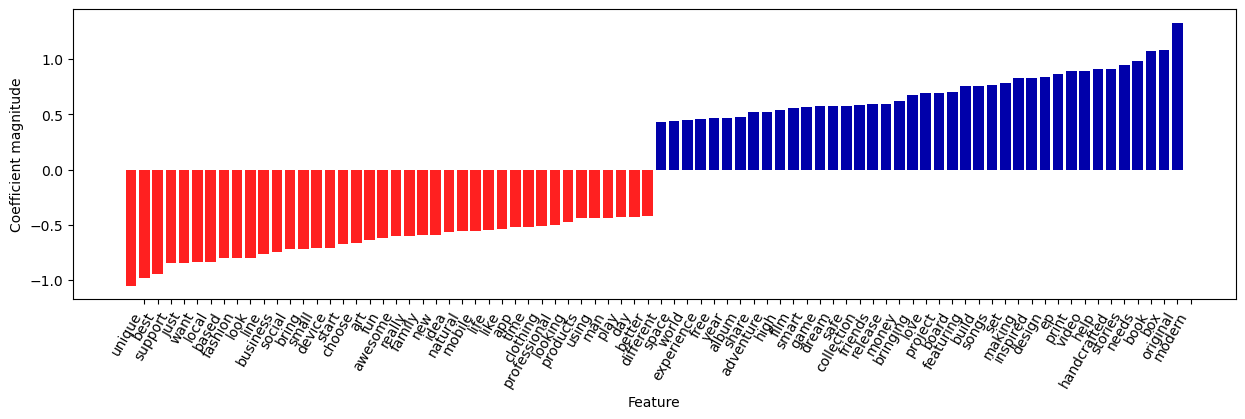

In [27]:
import mglearn

#feature_names = 
mglearn.tools.visualize_coefficients(lr.coef_[0],feature_names, n_top_features=40)

N-gram

In [28]:
print("bards_words:\n", bards_words)

cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Vocabulary Size:", len(cv.vocabulary_))
print("Vocabulary Content:\n", cv.vocabulary_)

bards_words:
 ["The fool don't think he is a fool,", 'but the wise man knows himself to be a fool']
Vocabulary Size: 13
Vocabulary Content:
 {'the': 9, 'fool': 3, 'don': 2, 'think': 10, 'he': 4, 'is': 6, 'but': 1, 'wise': 12, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [29]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Vocabulary Size:", len(cv.vocabulary_))
print("Vocabulary Content:\n", cv.vocabulary_)

Vocabulary Size: 14
Vocabulary Content:
 {'the fool': 9, 'fool don': 3, 'don think': 2, 'think he': 11, 'he is': 4, 'is fool': 6, 'but the': 1, 'the wise': 10, 'wise man': 13, 'man knows': 8, 'knows himself': 7, 'himself to': 5, 'to be': 12, 'be fool': 0}


In [30]:
print("Dense representation of bag_of_words:\n", cv.transform(bards_words).toarray())

Dense representation of bag_of_words:
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [31]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Vocabulary Size:", len(cv.vocabulary_))
print("Vocabulary:\n", cv.get_feature_names_out())

Vocabulary Size: 39
Vocabulary:
 ['be' 'be fool' 'but' 'but the' 'but the wise' 'don' 'don think'
 'don think he' 'fool' 'fool don' 'fool don think' 'he' 'he is'
 'he is fool' 'himself' 'himself to' 'himself to be' 'is' 'is fool'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool don' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [32]:
vect = TfidfVectorizer(min_df=6, ngram_range=(1, 3), stop_words="english").fit(X_text_train)
X_train = vect.transform(X_text_train)
X_test = vect.transform(X_text_test)

print("Vocabulary Size:", len(vect.vocabulary_))
feature_names = vect.get_feature_names_out()

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("Train accuracy: {:.5f}".format(lr.score(X_train, y_train)))
print("Test accuracy: {:.5f}".format(lr.score(X_test, y_test)))

Vocabulary Size: 148
Train accuracy: 0.76174
Test accuracy: 0.70833


In [33]:
print(feature_names)

['100' '3d' 'adventure' 'album' 'amazing' 'app' 'art' 'artists'
 'available' 'awesome' 'based' 'best' 'better' 'big' 'board' 'book' 'box'
 'brand' 'bring' 'bringing' 'build' 'building' 'business' 'car' 'child'
 'children' 'choose' 'christmas' 'city' 'clothing' 'collection' 'come'
 'community' 'company' 'create' 'creating' 'creative' 'day' 'delicious'
 'design' 'designed' 'device' 'different' 'dream' 'en' 'end' 'ep'
 'experience' 'family' 'fashion' 'fast' 'featuring' 'film' 'free'
 'friends' 'fun' 'funds' 'game' 'games' 'good' 'great' 'hand'
 'handcrafted' 'help' 'help make' 'high' 'home' 'idea' 'inspired'
 'journey' 'just' 'kids' 'learn' 'let' 'life' 'like' 'line' 'live' 'local'
 'look' 'looking' 'love' 'make' 'making' 'man' 'mobile' 'modern' 'money'
 'music' 'natural' 'need' 'need help' 'needs' 'new' 'old' 'online' 'open'
 'original' 'people' 'place' 'play' 'power' 'print' 'products'
 'professional' 'project' 'quality' 'raise' 'real' 'reality' 'really'
 'record' 'recording' 'release' 

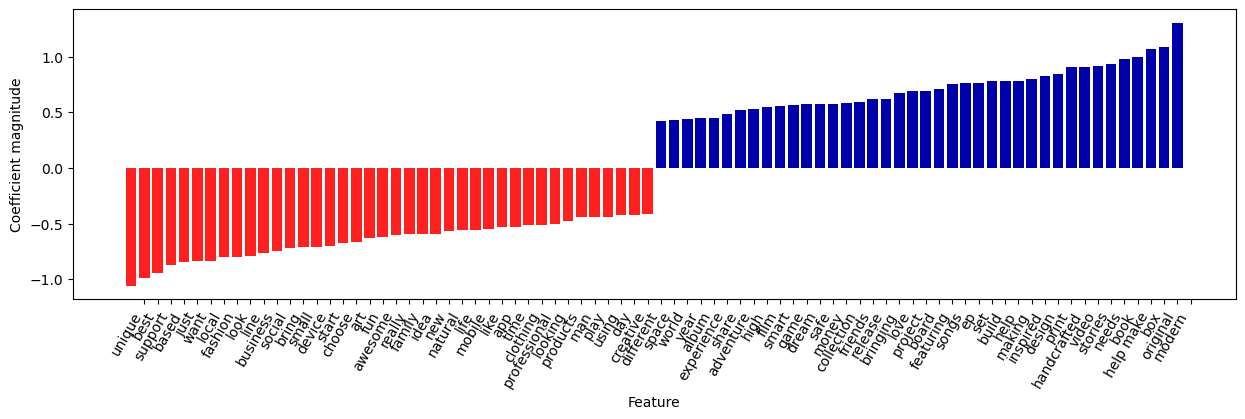

In [34]:
mglearn.tools.visualize_coefficients(lr.coef_[0],feature_names, n_top_features=40)

Advanced Tokenization, stemming, lemmatization

In [35]:
import spacy
print("spacy version", spacy.__version__)
import nltk
print("nltk version", nltk.__version__)

spacy version 3.7.2
nltk version 3.8.1


In [37]:
import spacy
import nltk

# load spacy's English-language models
en_nlp = spacy.load("en_core_web_sm")

# instantiate nltk's Porter stemmer
stemmer = nltk.stem.PorterStemmer()

# define function to compare lemmatization in spacy with stemming in nltk
def compare_normalization(doc):
    # tokenize document in spacy
    doc_spacy = en_nlp(doc)
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])
    
compare_normalization("Our meeting today was worse than yesterday, "
                    "I'm scared of meeting the clients tomorrow.")

c:\ProgramData\anaconda3\lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [38]:
en_nlp = spacy.load('en_core_web_sm')

def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

X_train_lemma = lemma_vect.fit_transform(X_text_train)
print("X_train_lemma.shape:", X_train_lemma.shape)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


X_train_lemma.shape: (575, 359)


In [39]:
vect = CountVectorizer(min_df=5).fit(X_text_train)
X_train = vect.transform(X_text_train)
print("X_train default.shape:", X_train.shape)

X_train default.shape: (575, 304)


In [40]:
df.head()

,Project ID,Title,Backers,Funded,FundedRate,Success,Country,CountryCode,ShortDescription,VideoCount,...,#ofCreation,#ofSuccess,#ofInvest,#ofInvestSuccess,보상수,#ofCommenters,#ofComments,Total_Updates,Updates_Likes,Updates_Comments
0,prjt1,Give Ear Gospel Songs by Michael hathaway — Ki...,0,0.00,0.00,NaN,"Nashville, TN",1,In order to finish my album I need 4800.00 to ...,0,...,1,0,0,0,1,0,0,0,0,0
1,prjt2,Mentally Strong Book by Michelle Jacobi — Kick...,4,1140.00,11.40,NaN,"Marsing, ID",1,"After an MS diagnosis at age 29, Michelle Jaco...",0,...,11,0,0,0,9,0,0,0,0,0
2,prjt3,High Quality Delta 3D Printer For Everybode by...,0,0.00,0.00,NaN,"Deutsch, Germany",6,"Hi, my name is Jörn. I would like to create a ...",0,...,1,0,0,0,2,0,0,0,0,0
3,prjt4,United - Helping hand by Marco Da Veiga — Kick...,1,34.51,0.10,NaN,"Oslo, Norway",9,I am creating my dream. My love and passion fo...,0,...,1,0,0,0,4,0,0,7,2,0
4,prjt5,UNCLIP - Quick Release Carabiner/Bottle Opener...,1510,52471.00,1049.42,NaN,"San Diego, CA",1,Unclip is a Quick Release Carabiner/ Bottle Op...,0,...,1,0,0,4,8,18,31,13,88,13


## Topic Modeling and Document clustering
### Latent Dirichlet Allocation (LDA)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words="english", max_df=.15)
X = vect.fit_transform(df["ShortDescription"])
X

<767x4105 sparse matrix of type '<class 'numpy.int64'>'
	with 8226 stored elements in Compressed Sparse Row format>

In [42]:
vect = CountVectorizer(max_features = 1000, max_df=.15)
X = vect.fit_transform(df["ShortDescription"])
X

<767x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6935 stored elements in Compressed Sparse Row format>

In [43]:
pd.set_option("display.max_columns", 1000)
df_1000 = pd.DataFrame(X.toarray())
df_1000.columns = vect.get_feature_names_out()
df_1000

,000,10,100,11,12,1st,20,2015,2016,25,2d,3d,500,about,access,accessory,achieve,across,action,active,actually,add,adult,adults,advanced,adventure,adventures,africa,after,again,age,ages,album,all,allow,allows,along,also,always,am,amazing,america,american,an,ancient,angels,animal,animated,any,anyone,anytime,anywhere,app,apparel,apple,application,apps,arduino,are,around,art,artist,artists,artwork,as,ass,at,author,automotive,available,avec,award,awesome,babies,back,bad,bag,balls,bamboo,band,bands,based,battle,be,beard,beautiful,beauty,because,become,been,before,being,best,better,between,big,bike,black,blocks,board,body,book,books,box,boy,brand,bring,bringing,british,brother,build,building,business,but,buy,by,calendar,call,called,campaign,can,candy,canvas,car,card,cards,care,cat,cd,center,challenge,change,changes,changing,channel,chef,chic,chicken,child,children,choose,christmas,city,classes,classic,clean,clever,clothing,cloud,co,coffee,cold,collection,college,color,com,combines,come,comfort,comic,community,companion,company,complete,computer,conceptual,connected,connection,continue,control,cool,cooler,could,country,course,cover,craft,crafted,craftsmanship,create,created,creating,creative,creativity,credit,culture,current,custom,cut,daily,dance,dark,day,days,de,debut,deck,dedicated,delicious,deliver,delivered,delivering,deserves,design,designed,designer,designs,developers,development,device,die,different,directed,directly,disabilities,discover,do,documentary,dog,don,donate,done,door,dream,dreams,drink,durable,during,each,early,earth,easy,eco,edition,ein,eine,el,elastic,else,em,emergency,en,end,endless,energy,english,enhance,enjoy,enough,ensemble,entertainment,entire,environment,ep,epic,equipment,era,es,essentials,et,europe,european,even,event,events,eventually,ever,every,everyday,everyone,everything,evil,exciting,exclusively,expand,experience,experiences,exploitation,explores,extremely,eye,eyes,fabric,fairy,fallen,families,family,fan,fans,fantasy,far,farm,farmers,fashion,fashionable,fast,favorite,favourite,fear,features,featuring,feel,female,festival,fi,fiber,fibers,fiction,fifteen,files,fill,filled,film,filmed,filming,films,final,finally,financial,find,finds,fine,finest,finish,finished,first,fishing,fit,fitness,five,flare,flashlight,fly,flying,focused,focusing,folds,follow,follows,food,foods,football,footwear,forget,forgotten,form,formed,free,freely,fresh,friends,from,front,frontier,full,fun,fund,funding,funds,funny,future,game,games,gaming,gear,get,getting,gifts,girl,give,gives,giving,global,gluten,go,goal,goals,going,good,graphic,great,green,group,growing,growth,guide,guitar,guys,gym,had,hair,hand,handcrafted,handles,handmade,hands,happen,happiness,hard,has,have,having,he,head,healthy,heard,heart,heat,hello,help,helping,helps,her,here,hey,hidden,high,highly,hip,his,history,hive,home,homemade,honey,hop,hope,hours,house,how,http,human,idea,identity,if,illustrated,illustrations,im,images,imagination,impact,independent,information,innovative,inside,inspire,inspired,inspiring,intended,interactive,interests,into,island,isn,it,items,its,jazz,je,jersey,jobs,john,join,journey,joy,jump,just,keep,keeps,key,keychain,keys,kick,kickstarter,kid,kids,kind,king,kit,kitchen,knit,knitwear,know,known,la,label,land,landscape,language,languages,laser,last,launch,learn,learning,leather,leave,led,left,legendary,less,let,lets,level,life,lifelong,lifestyle,lift,light,lightweight,like,limited,line,lines,link,liquid,list,listen,literature,little,live,lives,living,ll,local,locally,located,location,london,look,looked,looking,los,lose,lost,lounge,love,loved,loves,low,lp,lunar,luxury,mad,made,magazine,magic,magical,mailbox,major,make,makers,makes,making,man,management,managers,manga,manufacturing,many,market,materials,maybe,me,meal,media,meets,memories,memory,messages,metal,military,mind,minimalist,minutes,mission,mobile,models,modern,money,month,more,most,movie,much,multi,multiplayer,music,musicians,must,my,myself,name,national,native,natural,nature,need,needs

In [44]:
df_1000.drop(columns=['000','10','100','11','12','20', '2015', '2016', '25', '500'], inplace=True)
df_1000

,1st,2d,3d,about,access,accessory,achieve,across,action,active,actually,add,adult,adults,advanced,adventure,adventures,africa,after,again,age,ages,album,all,allow,allows,along,also,always,am,amazing,america,american,an,ancient,angels,animal,animated,any,anyone,anytime,anywhere,app,apparel,apple,application,apps,arduino,are,around,art,artist,artists,artwork,as,ass,at,author,automotive,available,avec,award,awesome,babies,back,bad,bag,balls,bamboo,band,bands,based,battle,be,beard,beautiful,beauty,because,become,been,before,being,best,better,between,big,bike,black,blocks,board,body,book,books,box,boy,brand,bring,bringing,british,brother,build,building,business,but,buy,by,calendar,call,called,campaign,can,candy,canvas,car,card,cards,care,cat,cd,center,challenge,change,changes,changing,channel,chef,chic,chicken,child,children,choose,christmas,city,classes,classic,clean,clever,clothing,cloud,co,coffee,cold,collection,college,color,com,combines,come,comfort,comic,community,companion,company,complete,computer,conceptual,connected,connection,continue,control,cool,cooler,could,country,course,cover,craft,crafted,craftsmanship,create,created,creating,creative,creativity,credit,culture,current,custom,cut,daily,dance,dark,day,days,de,debut,deck,dedicated,delicious,deliver,delivered,delivering,deserves,design,designed,designer,designs,developers,development,device,die,different,directed,directly,disabilities,discover,do,documentary,dog,don,donate,done,door,dream,dreams,drink,durable,during,each,early,earth,easy,eco,edition,ein,eine,el,elastic,else,em,emergency,en,end,endless,energy,english,enhance,enjoy,enough,ensemble,entertainment,entire,environment,ep,epic,equipment,era,es,essentials,et,europe,european,even,event,events,eventually,ever,every,everyday,everyone,everything,evil,exciting,exclusively,expand,experience,experiences,exploitation,explores,extremely,eye,eyes,fabric,fairy,fallen,families,family,fan,fans,fantasy,far,farm,farmers,fashion,fashionable,fast,favorite,favourite,fear,features,featuring,feel,female,festival,fi,fiber,fibers,fiction,fifteen,files,fill,filled,film,filmed,filming,films,final,finally,financial,find,finds,fine,finest,finish,finished,first,fishing,fit,fitness,five,flare,flashlight,fly,flying,focused,focusing,folds,follow,follows,food,foods,football,footwear,forget,forgotten,form,formed,free,freely,fresh,friends,from,front,frontier,full,fun,fund,funding,funds,funny,future,game,games,gaming,gear,get,getting,gifts,girl,give,gives,giving,global,gluten,go,goal,goals,going,good,graphic,great,green,group,growing,growth,guide,guitar,guys,gym,had,hair,hand,handcrafted,handles,handmade,hands,happen,happiness,hard,has,have,having,he,head,healthy,heard,heart,heat,hello,help,helping,helps,her,here,hey,hidden,high,highly,hip,his,history,hive,home,homemade,honey,hop,hope,hours,house,how,http,human,idea,identity,if,illustrated,illustrations,im,images,imagination,impact,independent,information,innovative,inside,inspire,inspired,inspiring,intended,interactive,interests,into,island,isn,it,items,its,jazz,je,jersey,jobs,john,join,journey,joy,jump,just,keep,keeps,key,keychain,keys,kick,kickstarter,kid,kids,kind,king,kit,kitchen,knit,knitwear,know,known,la,label,land,landscape,language,languages,laser,last,launch,learn,learning,leather,leave,led,left,legendary,less,let,lets,level,life,lifelong,lifestyle,lift,light,lightweight,like,limited,line,lines,link,liquid,list,listen,literature,little,live,lives,living,ll,local,locally,located,location,london,look,looked,looking,los,lose,lost,lounge,love,loved,loves,low,lp,lunar,luxury,mad,made,magazine,magic,magical,mailbox,major,make,makers,makes,making,man,management,managers,manga,manufacturing,many,market,materials,maybe,me,meal,media,meets,memories,memory,messages,metal,military,mind,minimalist,minutes,mission,mobile,models,modern,money,month,more,most,movie,much,multi,multiplayer,music,musicians,must,my,myself,name,national,native,natural,nature,need,needs,neighborhood,network,never,new,next,

In [45]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=25, random_state=0)

document_topics = lda.fit_transform(df_1000)
print("lda.components_.shape:", lda.components_.shape)
lda.components_

lda.components_.shape: (10, 990)


array([[0.1       , 0.1       , 0.10000399, ..., 0.1       , 0.1       ,
        1.09999982],
       [0.1       , 0.1       , 0.10000325, ..., 0.1       , 0.1       ,
        0.1       ],
       [1.93948265, 1.10000212, 0.10000215, ..., 1.09997107, 0.1       ,
        0.1       ],
       ...,
       [1.26051735, 0.1       , 0.1       , ..., 1.09993547, 3.09996877,
        0.10001026],
       [0.1       , 0.1       , 1.09996043, ..., 0.1       , 1.10000355,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ]])

In [46]:
pd.DataFrame(lda.components_)

0         1          2          3         4         5         6    \
0  0.100000  0.100000   0.100004   1.352333  1.100000  1.100003  0.100000   
1  0.100000  0.100000   0.100003   0.100007  0.100000  0.100000  0.100000   
2  1.939483  1.100002   0.100002  11.659547  2.100016  0.100000  0.100000   
3  0.100000  1.100001   0.100021   5.449937  1.099996  0.100000  1.100002   
4  0.100000  0.100000   0.100000   3.936972  0.100000  1.100003  1.100002   
5  0.100000  1.099997   0.100000   4.464642  0.100000  1.099993  1.099996   
6  0.100000  0.100000  13.100010   0.100005  1.099989  0.100000  0.100000   
7  1.260517  0.100000   0.100000   8.736555  0.100000  0.100000  0.100000   
8  0.100000  0.100000   1.099960   0.100000  0.100000  0.100000  0.100000   
9  0.100000  0.100000   0.100000   0.100001  0.100000  0.100000  0.100000   

        7         8         9         10        11        12        13   \
0  0.100000  0.100000  1.100004  0.100000  0.100000  0.100000  0.100000   
1  0.100000  0.100000  0.100000  0.100000  1.099997  0.100000  0.100000   
2  1.669212  3.099981  1.100000  0.100000  0.100000  0.100000  0.100000   
3  2.988189  2.099988  1.099997  0.100000  0.100000  0.100000  1.099998   
4  0.100000  0.100000  0.100000  1.099993  2.100003  1.100001  0.100000   
5  0.100000  0.100026  0.100000  0.100000  0.100000  1.099999  0.100000   
6  2.530787  0.100005  0.100000  0.100000  0.100000  0.100000  2.100002   
7  1.211812  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
8  0.100000  0.100000  0.100000  2.100007  0.100000  0.100000  0.100000   
9  0.100000  0.100000  0.100000  0.100000  0.100000  1.100000  0.100000   

        14        15        16        17        18        19        20   \
0  0.100000  3.100081  0.100000  0.100000  0.100000  1.100002  0.100000   
1  0.100000  3.100095  0.100000  0.100000  0.100000  0.100000  0.100003   
2  0.100000  1.099976  2.099976  0.100000  3.100018  1.099995  3.099970   
3  0.100000  1.099950  0.100082  0.100000  0.100000  0.100000  0.100000   
4  1.100000  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
5  0.100000  1.099964  0.100000  0.100000  2.100000  0.100000  0.100026   
6  1.099997  0.100000  1.099941  1.099993  0.100000  2.100024  0.100000   
7  0.100000  1.099934  0.100000  0.100000  1.099973  1.099969  0.100000   
8  1.100003  0.100000  0.100000  1.100003  0.100009  1.100009  0.100000   
9  0.100000  0.100000  0.100000  1.100004  0.100000  0.100000  0.100000   

        21         22        23        24        25        26        27   \
0  0.100000   0.100000  0.100014  0.100140  0.100023  0.100000  1.100004   
1  2.100014   0.100004  5.817001  1.100015  0.100000  1.100005  0.100000   
2  0.100000   0.100004  3.001312  0.100000  0.100000  0.100000  1.099995   
3  0.100000   0.100009  6.118808  1.099792  2.100011  0.100000  0.100000   
4  0.100000   0.100004  3.425554  0.100000  1.100001  0.100000  1.099997   
5  0.100000   0.100008  1.471697  0.100000  0.100007  2.099952  0.100000   
6  0.100000   5.976201  9.077411  0.100000  0.100000  0.100000  1.099998   
7  0.100000  19.939892  9.340905  0.100042  2.099966  0.100043  0.100000   
8  2.099986   1.147522  6.100149  1.100010  0.100000  0.100000  1.100007   
9  0.100000   1.336356  8.547148  0.100000  1.099991  0.100000  0.100000   

        28        29        30        31        32         33        34   \
0  0.100000  0.100000  0.100000  0.100000  0.100000   8.519386  0.100000   
1  0.100000  0.100003  0.100000  0.100000  1.100011   1.366862  0.100000   
2  3.100008  4.445679  4.099990  0.100000  1.099996  19.659219  0.100000   
3  1.099990  0.100000  0.100000  0.100000  1.100002   8.476908  1.099962   
4  1.099995  1.099996  0.100000  0.100000  0.100000   1.629924  0.100000   
5  0.100011  2.326683  0.100005  2.100005  1.099991   6.585899  0.100000   
6  1.099997  2.099982  2.099994  1.099995  0.100000   9.311449  4.100036   
7  0.100000  3.527648  0.100013  0.100000  0.100000  15.397691 

In [48]:
import numpy as np

# For each topic (a row in the components_), sort the features (ascending) 
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

In [49]:
mglearn.tools.print_topics(topics=range(10), feature_names=df_1000.columns,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
you           de            an            game          you           
book          by            our           you           no            
will          made          by            from          only          
this          this          you           new           will          
most          we            world         world         free          
have          quality       be            book          be            
ever          hand          about         best          has           
fun           from          it            an            dream         
an            et            her           on            love          
from          you           who           safe          her           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
on  

In [50]:
mglearn.tools.print_topics(topics=range(10), feature_names=df_1000.columns,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
you           de            an            game          you           
book          by            our           you           no            
will          made          by            from          only          
this          this          you           new           will          
most          we            world         world         free          
have          quality       be            book          be            
ever          hand          about         best          has           
fun           from          it            an            dream         
an            et            her           on            love          
from          you           who           safe          her           
we            high          on            board         by            
world         all           we            at            who           
can   

LDA using Gensim

In [51]:
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nsun5\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [52]:
df['tokenized'] = df['ShortDescription'].str.lower().apply(nltk.word_tokenize)
df['tokenized']

0      [in, order, to, finish, my, album, i, need, 48...
1      [after, an, ms, diagnosis, at, age, 29, ,, mic...
2      [hi, ,, my, name, is, jörn, ., i, would, like,...
3      [i, am, creating, my, dream, ., my, love, and,...
4      [unclip, is, a, quick, release, carabiner/, bo...
                             ...                        
762    [a, super, tough, toolbox-in-one, ,, the, zeus...
763    [help, us, discover, the, sound, of, central, ...
764    [a, cookbook, written, by, two, friends, commi...
765    [in, 138, comic, pages, shitty, jobs, ,, the, ...
766    [from, the, mind, of, a, gifted, child, invent...
Name: tokenized, Length: 767, dtype: object

In [53]:
# The averaged_perceptron_tagger.zip contains the pre-trained English [Part-of-Speech (POS]](https://en.wikipedia.org/wiki/Part_of_speech) tagger in NLTK.
nltk.download('averaged_perceptron_tagger')

df['tagged'] = df['tokenized'].apply(nltk.pos_tag)
df[['tagged']].head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nsun5\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,tagged
0,"[(in, IN), (order, NN), (to, TO), (finish, VB)..."
1,"[(after, IN), (an, DT), (ms, JJ), (diagnosis, ..."
2,"[(hi, NN), (,, ,), (my, PRP$), (name, NN), (is..."
3,"[(i, NN), (am, VBP), (creating, VBG), (my, PRP..."
4,"[(unclip, NN), (is, VBZ), (a, DT), (quick, JJ)..."


In [54]:
df['nouns'] = df['tagged'].apply(lambda x: [word for word, tag in x if tag in ['NN', 'NNS', 'NNP', 'NNPS']])
df['nouns']

0      [order, album, studio, time, award, players, a...
1      [diagnosis, age, jacobi, shares, story, strugg...
2      [hi, name, i, delta, printer, cheap, wich, sou...
3      [i, dream, love, passion, music, people, life,...
4      [unclip, release, carabiner/, bottle, opener, ...
                             ...                        
762    [toolbox-in-one, zeus, tool, accessory, city, ...
763    [sound, illinois, piece, john, orfe, youth, sy...
764          [cookbook, friends, happiness, home, pizza]
765    [pages, jobs, dreams, obsessions, weirdos, dov...
766         [mind, child, inventor, device, sound, play]
Name: nouns, Length: 767, dtype: object

In [55]:
from gensim import corpora

dictionary_noun = corpora.Dictionary(df['nouns'])
corpus_noun = [dictionary_noun.doc2bow(text) for text in df['nouns']]
print(dictionary_noun)
dictionary_noun[5]


Dictionary<2626 unique tokens: ['.asa', 'album', 'award', 'order', 'players']...>


'studio'

In [57]:
print(len(corpus_noun))
print(corpus_noun)
print(len(corpus_noun[1]))

767
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(10, 1), (19, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)], [(38, 1), (39, 1), (40, 1), (41, 1)], [(13, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1)], [(54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)], [(61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)], [(67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1)], [(73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1)], [(27, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)], [(87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1)], [(21, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1)], [(51, 2), 

In [58]:
import gensim
    
NUM_TOPICS = 6 
print("noun")
ldamodel = gensim.models.ldamodel.LdaModel(corpus_noun, num_topics = NUM_TOPICS, 
                                           id2word=dictionary_noun, passes=15)
'''
id2word : {dict of (int, str), :class:`gensim.corpora.dictionary.Dictionary`}
    Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for
    debugging and topic printing.
    
passes : int, optional
    Number of passes through the corpus during training.
'''
topics = ldamodel.print_topics(num_words=8) # the number of words to show per a topic
for topic in topics:
    print(topic)

noun
(0, '0.017*"game" + 0.008*"life" + 0.008*"children" + 0.007*"art" + 0.007*"quality" + 0.006*"world" + 0.005*"fun" + 0.005*"album"')
(1, '0.015*"i" + 0.011*"music" + 0.008*"help" + 0.006*"love" + 0.006*"year" + 0.005*"community" + 0.005*"day" + 0.005*"story"')
(2, '0.010*"people" + 0.008*"game" + 0.008*"book" + 0.007*"series" + 0.007*"world" + 0.006*"space" + 0.005*"design" + 0.005*"help"')
(3, '0.007*"i" + 0.007*"time" + 0.005*"film" + 0.005*"help" + 0.004*"art" + 0.003*"app" + 0.003*"line" + 0.003*"look"')
(4, '0.015*"music" + 0.014*"world" + 0.010*"project" + 0.008*"way" + 0.007*"book" + 0.007*"i" + 0.007*"life" + 0.007*"story"')
(5, '0.009*"world" + 0.007*"way" + 0.007*"book" + 0.006*"i" + 0.006*"album" + 0.005*"art" + 0.004*"man" + 0.004*"food"')


In [66]:
# pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus_noun, dictionary_noun, sort_topics = False, n_jobs=1)
pyLDAvis.display(vis)

In [67]:
for i, topic_list in enumerate(ldamodel[corpus_noun]):
    if i==10:
        break
    print(i,"th document's topic ratios:",topic_list)

0 th document's topic ratios: [(0, 0.9069132), (1, 0.018633572), (2, 0.018596636), (3, 0.018631164), (4, 0.01861406), (5, 0.018611357)]
1 th document's topic ratios: [(0, 0.016693955), (1, 0.016714294), (2, 0.016696865), (3, 0.016676608), (4, 0.91654426), (5, 0.016674068)]
2 th document's topic ratios: [(0, 0.018567055), (1, 0.018619418), (2, 0.018563347), (3, 0.9070963), (4, 0.018582366), (5, 0.018571552)]
3 th document's topic ratios: [(0, 0.016732655), (1, 0.5860164), (2, 0.016929116), (3, 0.01674759), (4, 0.34683466), (5, 0.016739536)]
4 th document's topic ratios: [(0, 0.020870509), (1, 0.020881234), (2, 0.020836823), (3, 0.8956233), (4, 0.02086143), (5, 0.020926643)]
5 th document's topic ratios: [(0, 0.0335104), (1, 0.83265644), (2, 0.033379864), (3, 0.033428904), (4, 0.03337761), (5, 0.033646747)]
6 th document's topic ratios: [(0, 0.02089461), (1, 0.8955796), (2, 0.020853046), (3, 0.020913139), (4, 0.02088603), (5, 0.020873604)]
7 th document's topic ratios: [(0, 0.02092424), 

In [68]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v') # c_v between 0 and 1
        coherence_values.append(coherencemodel.get_coherence())
        perplexity = model.log_perplexity(corpus)
        perplexity_values.append(perplexity)

    return model_list, coherence_values, perplexity_values

In [69]:
def coherence_graph(start, limit, step, coherence_values, perplexity_values):
    
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.show()
    
    for m, cv, pp in zip(x, coherence_values, perplexity_values):
        print("Num Topics =", m, " has Coherence Value of", round(cv, 4), "perplexity: ", pp)

In [70]:
limit = 30; start = 1; step = 1

model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary_noun, 
                                                                           corpus_noun, df['nouns'], limit, start, step)
evaluation = [(topic, coherence) for topic, coherence in zip(range(start, limit, step), coherence_values)]

NameError: name 'plt' is not defined

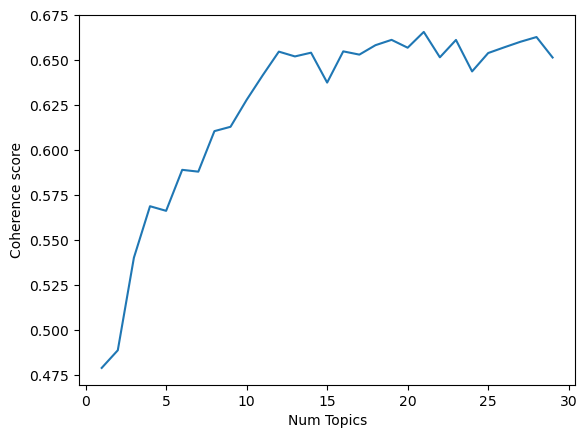

Num Topics = 1  has Coherence Value of 0.4788 perplexity:  -7.781321152421823
Num Topics = 2  has Coherence Value of 0.4886 perplexity:  -8.068736395459338
Num Topics = 3  has Coherence Value of 0.5401 perplexity:  -8.166584845295484
Num Topics = 4  has Coherence Value of 0.5688 perplexity:  -8.25684580838806
Num Topics = 5  has Coherence Value of 0.5662 perplexity:  -8.308706695437596
Num Topics = 6  has Coherence Value of 0.589 perplexity:  -8.368342630236032
Num Topics = 7  has Coherence Value of 0.588 perplexity:  -8.415322776191122
Num Topics = 8  has Coherence Value of 0.6105 perplexity:  -8.457335409200198
Num Topics = 9  has Coherence Value of 0.6129 perplexity:  -8.47303825045707
Num Topics = 10  has Coherence Value of 0.6279 perplexity:  -8.540430250008795
Num Topics = 11  has Coherence Value of 0.6416 perplexity:  -8.581761032967895
Num Topics = 12  has Coherence Value of 0.6547 perplexity:  -8.592700205444894
Num Topics = 13  has Coherence Value of 0.6521 perplexity:  -8.60

In [71]:
import matplotlib.pyplot as plt
coherence_graph(start, limit, step, coherence_values, perplexity_values)